# My first twitterbot

In [1]:
import tweepy
import creds
import os
import random


In [2]:
auth = tweepy.OAuthHandler(creds.consumerkey, creds.consumersecret)
auth.set_access_token(creds.verifiertoken, creds.verifiersecret)
api = tweepy.API(auth)

api.update_status('Hello World Now')

# Mining a web site for content

This is bad and you really shouldn't do it ;)

- pull the index page and get the urls for topics
- pull each topic page and scrape for content
- serialise as json 


In [ ]:
import re 
import time
import requests, html



import json

def get_all_topics():
    url = 'https://www.brainyquote.com/topics'

    r = requests.get(url)
    ap = re.compile('<a href="(/topics/.*?)"')
    return ap.findall(r.text)

def get_topic(tag):
    
    def clean(x):
        author, quote = x
        bits = [x[0].upper() + x[1:] for x in author.split('_')]
        return ' '.join(bits), html.unescape(quote)

    pp = re.compile('<a href="/quotes/(.*?)_\d+.*?>(.*?)</a>',re.DOTALL)
    
    base_url = 'https://www.brainyquote.com'
    r = requests.get(base_url + tag)
    list_of_quotes = [ clean(entry) for entry in pp.findall(r.text)]
    
    with open(tag.split('/')[-1] + '.json','w' ) as fp:
        json.dump(list_of_quotes,fp)
        
    return list_of_quotes
        
    
    

In [61]:
fns = [fn for fn in os.listdir('.') if 'json' in fn]

with open(random.choice(fns),'r') as fp:
    quotes = json.loads(fp.read())
quotes

[['Kofi Annan',
  'Knowledge is power. Information is liberating. Education is the premise of progress, in every society, in every family.'],
 ['Mahatma Gandhi',
  'You must not lose faith in humanity. Humanity is an ocean; if a few drops of the ocean are dirty, the ocean does not become dirty.'],
 ['Christina Grimmie',
  "Be stupid, be dumb, be funny, if that's who you are. Don't try to be someone that society wants you to be; that's stupid. So be yourself."],
 ['Harry S Truman',
  'Men make history and not the other way around. In periods where there is no leadership, society stands still. Progress occurs when courageous, skillful leaders seize the opportunity to change things for the better.'],
 ['Frederick Douglass',
  'Where justice is denied, where poverty is enforced, where ignorance prevails, and where any one class is made to feel that society is an organized conspiracy to oppress, rob and degrade them, neither persons nor property will be safe.'],
 ['Vince Lombardi',
  'Indiv

# Main loop
 
 The code for scraping wikipedia needs pulled out.

*** 0
Work hard, be honest, help people, never give up, love your fellow man and woman, give back to society, and don't ever discriminate.

Jesse White
https://en.wikipedia.org/wiki/Jesse_White
*** 2
*** 0
We have created a society where individual rights and freedoms, compassion and diversity are core to our citizenship. But underlying that idea of Canada is the promise that we all have a chance to build a better life for ourselves and our children.

Justin Trudeau
https://en.wikipedia.org/wiki/Justin_Trudeau
*** 2
*** 0
Hatred is corrosive of a person's wisdom and conscience; the mentality of enmity can poison a nation's spirit, instigate brutal life and death struggles, destroy a society's tolerance and humanity, and block a nation's progress to freedom and democracy.

Liu Xiaobo
https://en.wikipedia.org/wiki/Liu_Xiaobo
*** 2
*** 0
Everyone in society should be a role model, not only for their own self-respect, but for respect from others.

Barry Bonds
https://en.wikipedia.org/wiki/

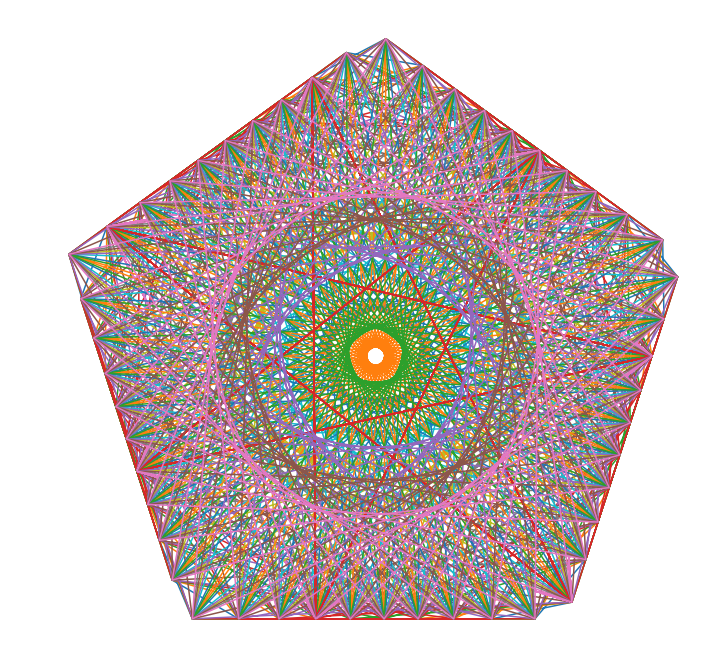

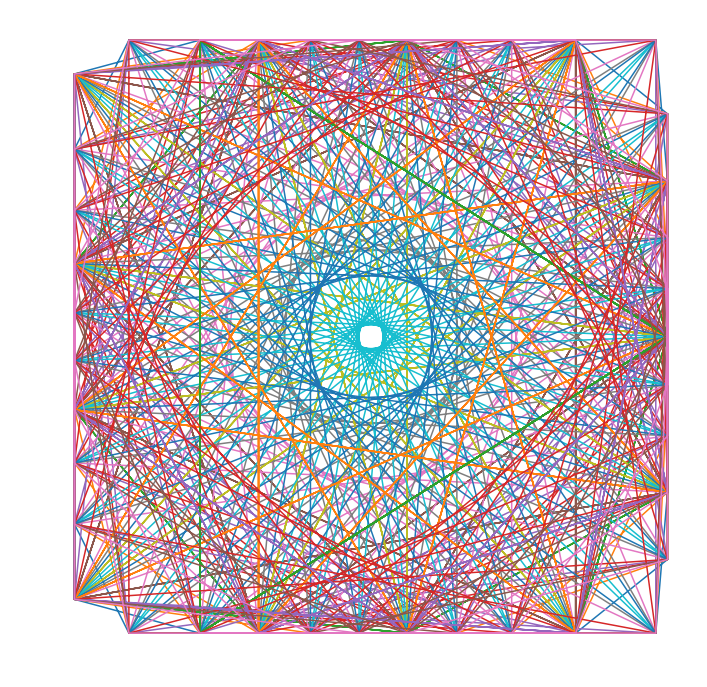

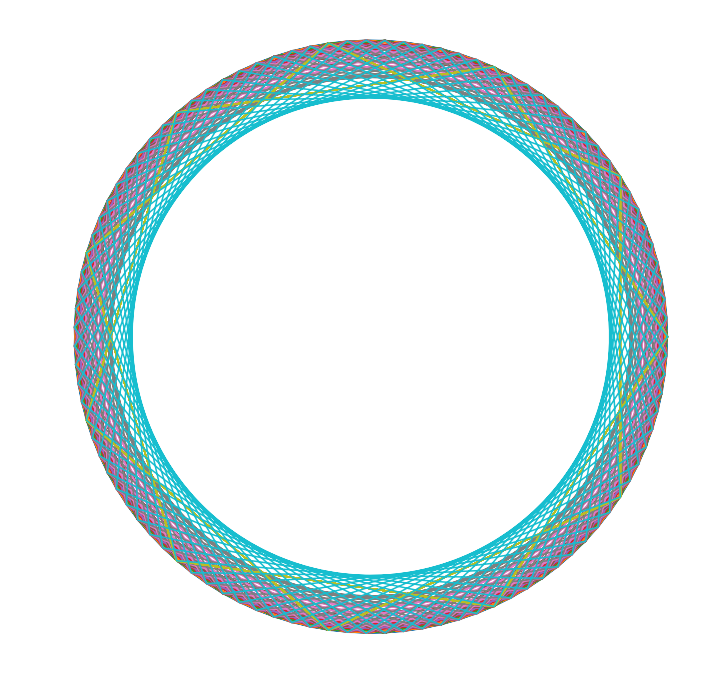

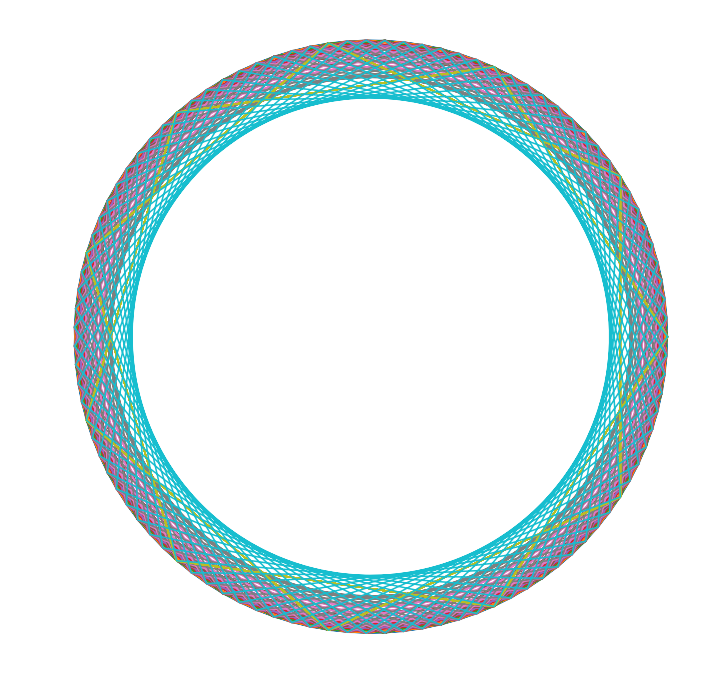

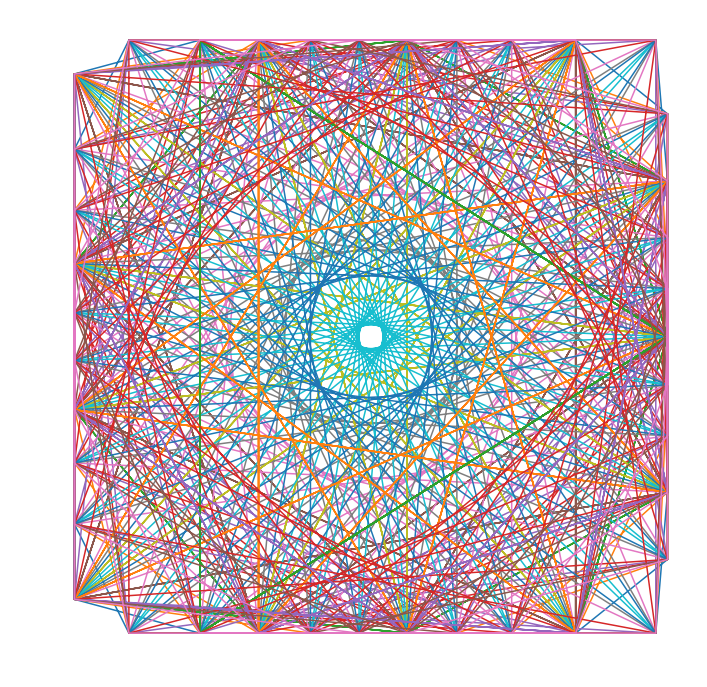

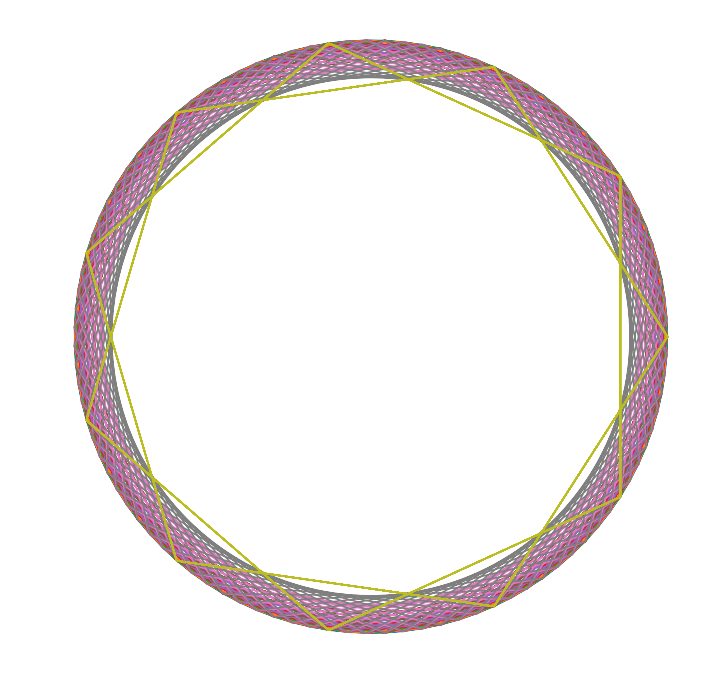

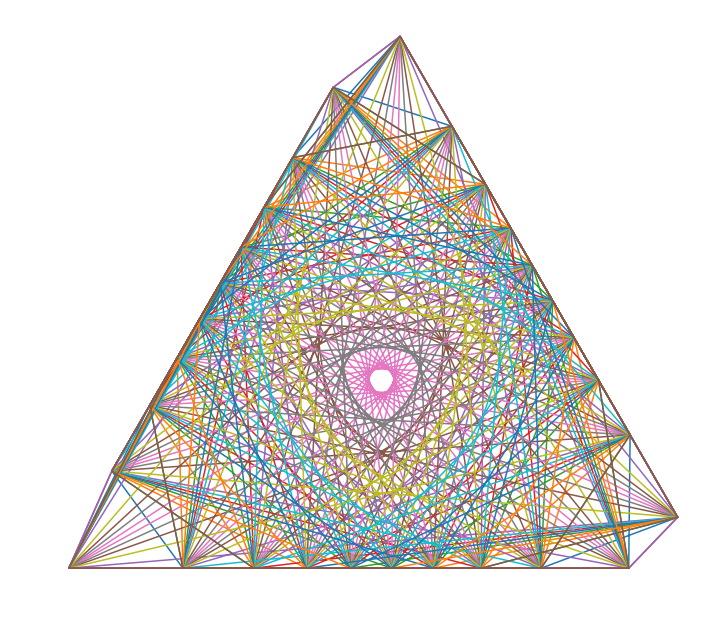

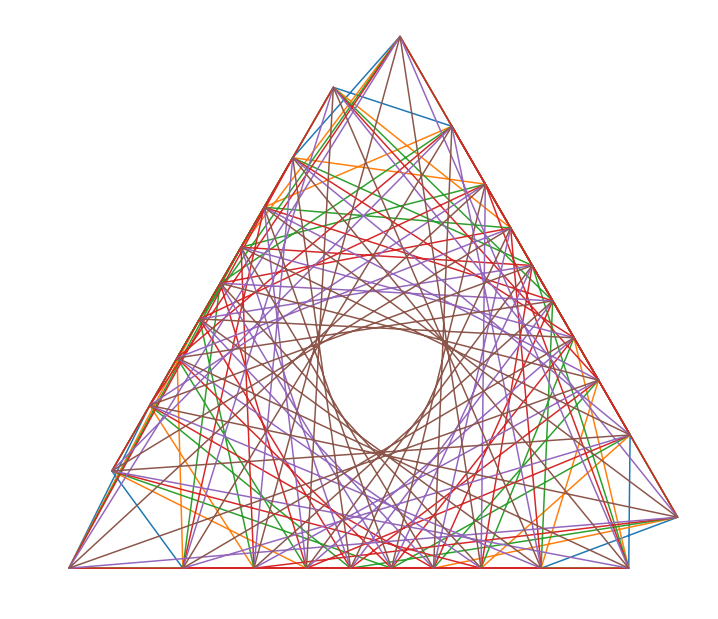

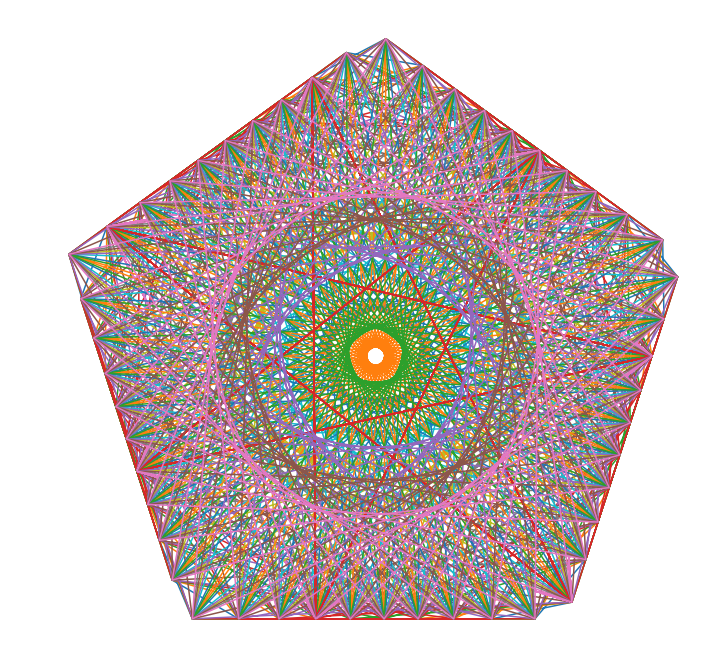

In [63]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content, 'lxml')

done = []

list_of_quotes = [(x,y) for x,y in quotes if len(x) + len(y) < 270]

txt_count = 0
for k in range(20):
    print('***', txt_count )
    if random.random() > .6 or txt_count > 4:
        
        make_fig(num_sides=random.choice([0,0,0,3,3,4,4,5,5,5,6,6,8,7,8]))
        api.update_with_media('ss.png', status=str(random.randint(2**20,2**21)))
        txt_count = 0
        time.sleep(30)
        continue
        
    aut, txt =list_of_quotes.pop()
   
    txt = txt + '\n'*2 + aut
    print(txt)
    
    api.update_status(txt)
    txt_count += 1
    time.sleep(30)
 
    url = 'https://en.wikipedia.org/wiki/' + aut.replace(' ','_')
    print(url)
    
    r = requests.get(url)
    #check for success
    if r.status_code != 200: 
        continue

    try:
        soup = BeautifulSoup(r.content, 'lxml')
        paras = [x.text for x in soup.find_all('p')]
        
        #get the first real paragraph
        for p in paras:
            if len(p) > 5: break
                
        #remove quoted txt   
        txt, depth = [''], 0
        for c in p:
            if c == '(' : depth += 1
            if depth == 0: txt.append(c)
            if c == ')' : depth -= 1
                
        #this fails on abreviations
        txt = ''.join(txt).split('.')[0]
        #swap out references
        txt = re.sub('\[\d+\]','',txt)
        #clip to character limit
        if len(txt) > 270: 
            txt = txt[:270] + '....'
        api.update_status(txt)  
        txt_count += 1
        
    except:
        print('WTF')
        make_fig()
        api.update_with_media('ss.png', status=str(random.randint(2**20,2**21)))
        txt_count = 0
        
    time.sleep(30)
    

# Graphics content

There is a hack to get a circle but who cares ?

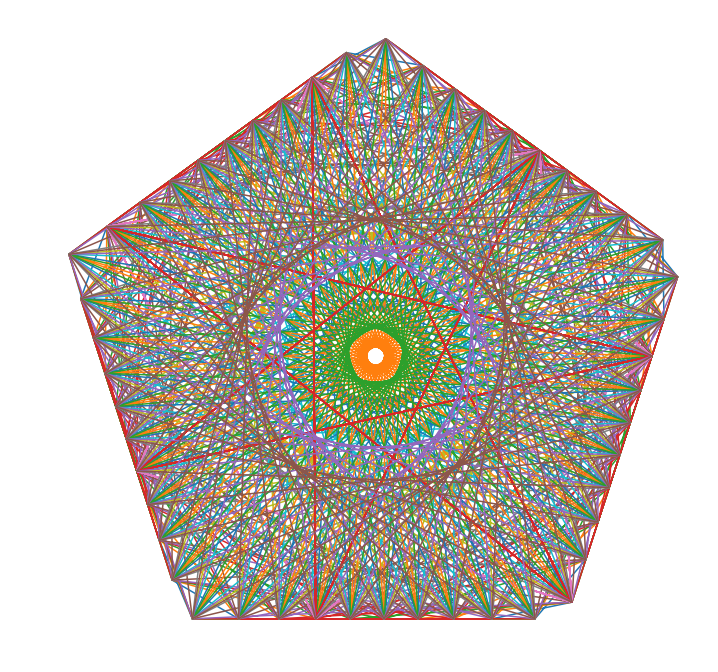

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

primes = list(range(2,100))

for k in range(0,5):
    primes = [y for y in primes 
                if y == primes[k] or y % primes[k] > 0 ]


    
def make_fig(num_sides=0):
    def ff(V, sides=0):
        if sides == 0: return V
        
        T = [2*np.pi/sides*t - (sides % 2)*np.pi/2 for t in range(sides)]
        A = [ [np.cos(t), np.sin(t)]  for t in T]
        A = np.array(A)
        #print(A)
        return V / np.amax( np.dot(A,V) , axis=0)
        
        
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.set_aspect(1) 
    ax.axis('off')

    n = random.choice(primes[8:])
    num_pts = 10*num_sides if num_sides > 0 else 100
    T = np.linspace(0,2*np.pi, num_pts )
    for m in range(2, int(n/2),2):
        V  = np.ones((2,len(T)))
        V[0,:] ,V[1,:] = np.cos(m*T), np.sin(m*T) 
        X, Y  = ff(V, sides=num_sides)
        ax.plot(X,Y)
        fig.savefig('ss.png')
    
    
make_fig(num_sides=5)



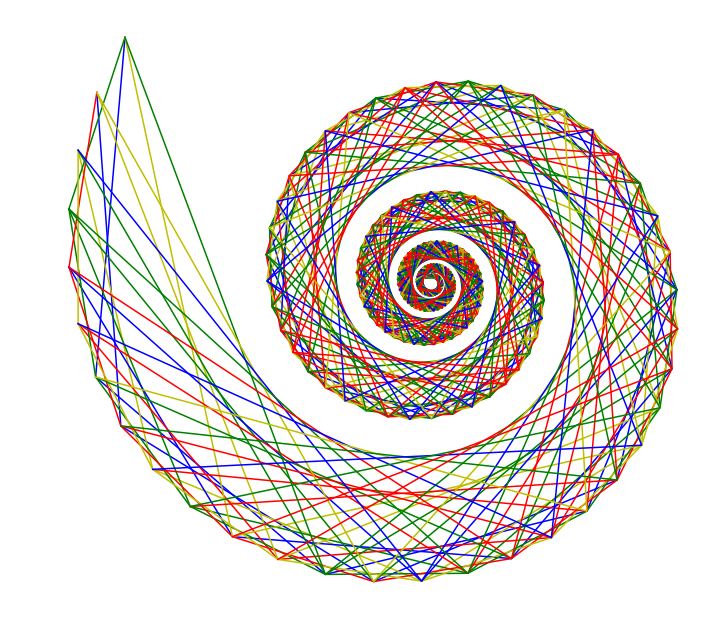

In [66]:
T = np.linspace(0,10*np.pi,200) + np.pi*random.random()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.set_aspect(1) 
ax.axis('off')

FF = np.exp(-T/8)
X, Y  = FF*np.cos(T), FF*np.sin(T) 

for k in  [6,3,10,12]:
    for off in range(k):
        style = random.choice(['r','g','b','y'])
        a, b = X[off::k], Y[off::k]
        ax.plot(a,b, style)

# Code for exploring Wikipedia

In [187]:
mp = re.compile("<li class='mw-search-result'>(.*?)</li>", re.DOTALL)

In [69]:
url = 'https://en.wikipedia.org/w/index.php?cirrusUserTesting=glent_m0&search=louis+pasteur&title=Special%3ASearch&go=Go&ns0=1'
url = 'https://en.wikipedia.org/wiki/Louis_Pasteur'

r = requests.get(url)

In [83]:
hp = re.compile('<a href="(.*?)".*?title="(.*?)">', re.DOTALL) 

In [111]:
def is_good(x):
    bad = 'redirect'  in x or '#cite' in x or  'Special' in x or 'Category' in x or 'http' in x
    return not bad

L = [ (x,y) for x,y in hp.findall(r.text) if is_good(x)][2:]
0
uu = 'https://en.wikipedia.org' +  random.choice(L)[0]